# matplotlib 作业   韩佩佳

# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
import seaborn as sns

In [4]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


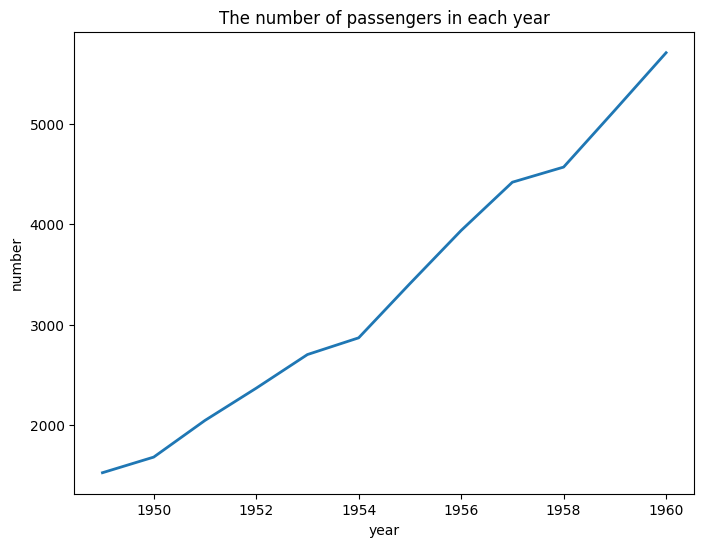

In [5]:
# 设置图片尺寸
plt.figure(figsize=(8, 6))

# 不显示网格
plt.grid(False)

# 设置背景
plt.gca().set_facecolor('white')
# 按年份对乘客数量求和
yearly_passengers = data.groupby('year')['passengers'].sum()

# 绘制折线图
plt.plot(yearly_passengers.index, yearly_passengers.values, lw=2)

# 添加标题和标签
plt.title("The number of passengers in each year")
plt.xlabel("year")
plt.ylabel("number")

# 显示图形
plt.show()

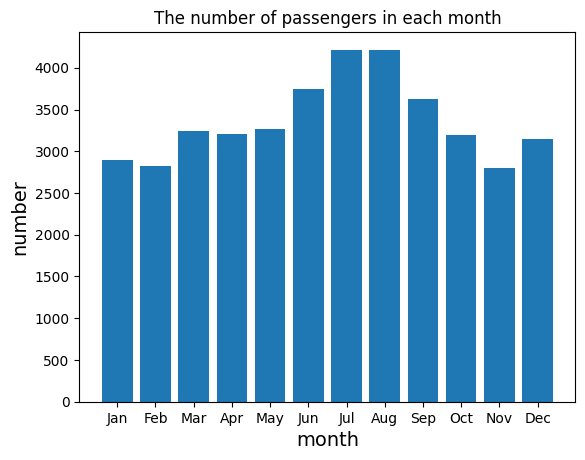

In [13]:
# 按月份对乘客数量求和
monthly_passengers = data.groupby('month')['passengers'].sum()

# 绘制折线图
plt.bar(monthly_passengers.index, monthly_passengers.values)

# 添加标题和标签
plt.title("The number of passengers in each month")
plt.xlabel("month", fontsize=14)
plt.ylabel("number", fontsize=14)

# 显示图形
plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [2]:
import seaborn as sns

In [3]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）

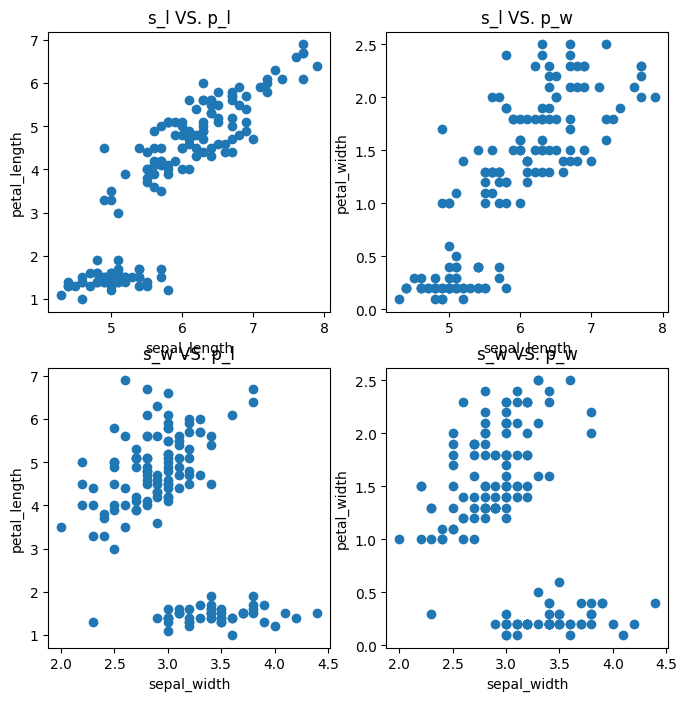

In [4]:
# 设置图片尺寸、字体、网格和背景
plt.rcParams.update({
    'figure.figsize': (8, 8),
    'axes.grid': False,
    'axes.facecolor': 'white'
})

# 创建一个2x2的图表布局
fig, axs = plt.subplots(2, 2)

# 散点图和标题
plots = {
    (0, 0): ('sepal_length', 'petal_length', 's_l VS. p_l'),
    (0, 1): ('sepal_length', 'petal_width', 's_l VS. p_w'),
    (1, 0): ('sepal_width', 'petal_length', 's_w VS. p_l'),
    (1, 1): ('sepal_width', 'petal_width', 's_w VS. p_w')
}

# 绘制所有的散点图
for (i, j), (x, y, title) in plots.items():
    axs[i, j].scatter(data[x], data[y])
    axs[i, j].set_title(title)
    axs[i, j].set_xlabel(x)
    axs[i, j].set_ylabel(y)

# 显示图形
plt.show()

### 2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）

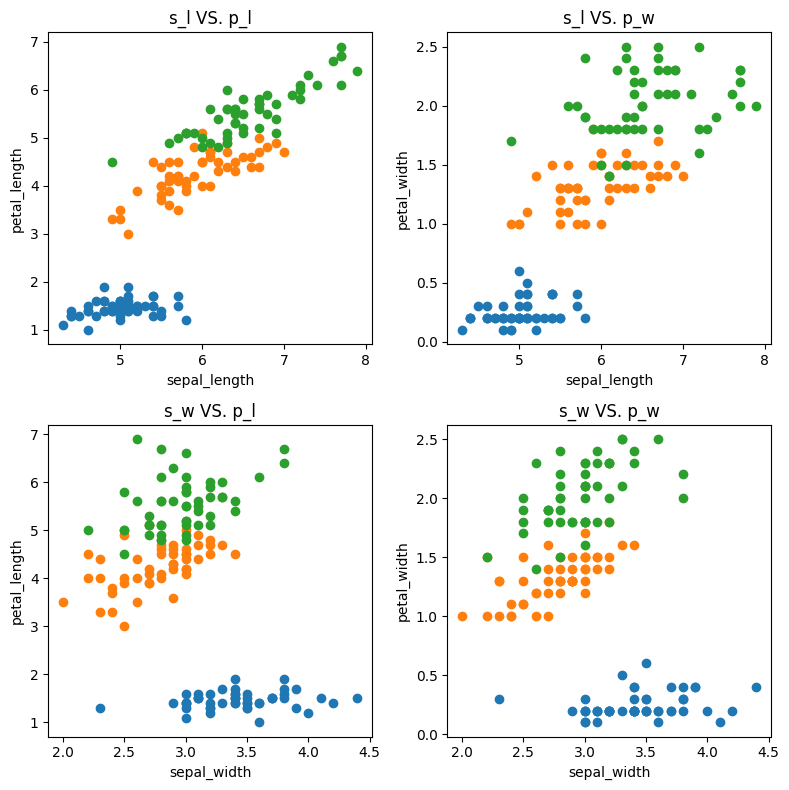

In [5]:
# 创建一个2x2的图表布局
fig, axs = plt.subplots(2, 2)

# 创建一个字典，包含所有的散点图和标题
plots = {
    (0, 0): ('sepal_length', 'petal_length', 's_l VS. p_l'),
    (0, 1): ('sepal_length', 'petal_width', 's_l VS. p_w'),
    (1, 0): ('sepal_width', 'petal_length', 's_w VS. p_l'),
    (1, 1): ('sepal_width', 'petal_width', 's_w VS. p_w')
}

# 绘制所有的散点图
for (i, j), (x, y, title) in plots.items():
    for species in data['species'].unique():
        subdata = data[data['species'] == species]
        axs[i, j].scatter(subdata[x], subdata[y])
    axs[i, j].set_title(title)
    axs[i, j].set_xlabel(x)
    axs[i, j].set_ylabel(y)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

### 3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

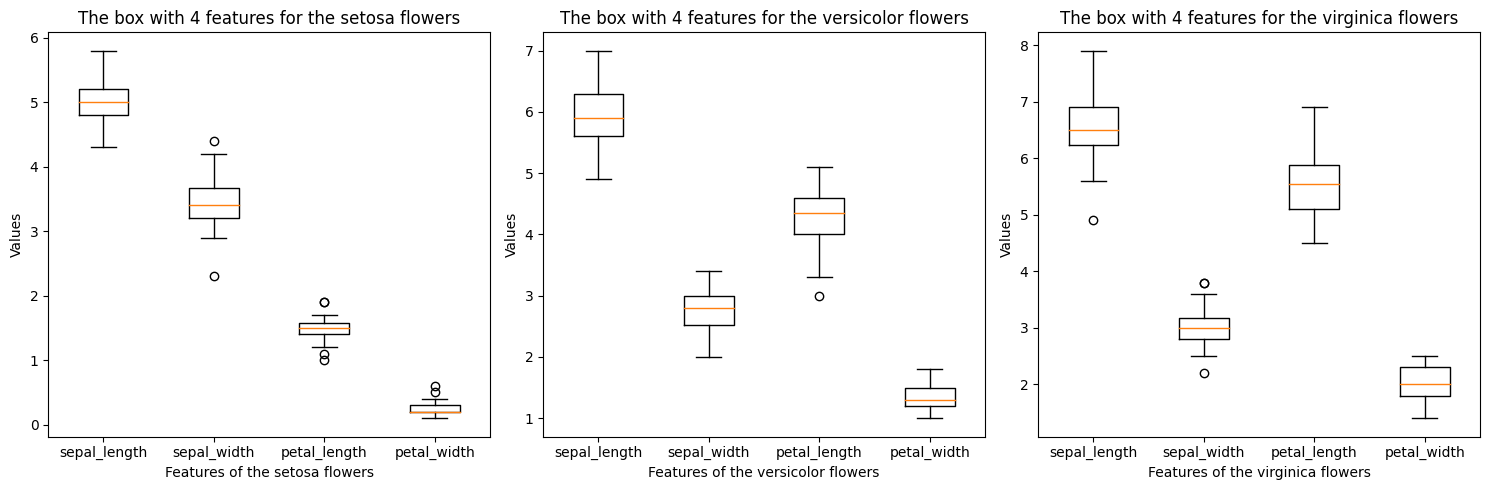

In [6]:
# 创建一个1x3的图表布局
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 创建一个列表，包含所有的花的种类
species = ['setosa', 'versicolor', 'virginica']

# 创建一个列表，包含所有的特征
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 绘制所有的箱线图
for i, spec in enumerate(species):
    axs[i].boxplot([data[data['species'] == spec][feature] for feature in features], labels=features)
    axs[i].set_title('The box with 4 features for the '+ spec +' flowers')
    axs[i].set_xlabel('Features of the '+ spec +' flowers')
    axs[i].set_ylabel('Values')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [7]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. 小费和总消费之间的关系（提示：散点图+回归分析）

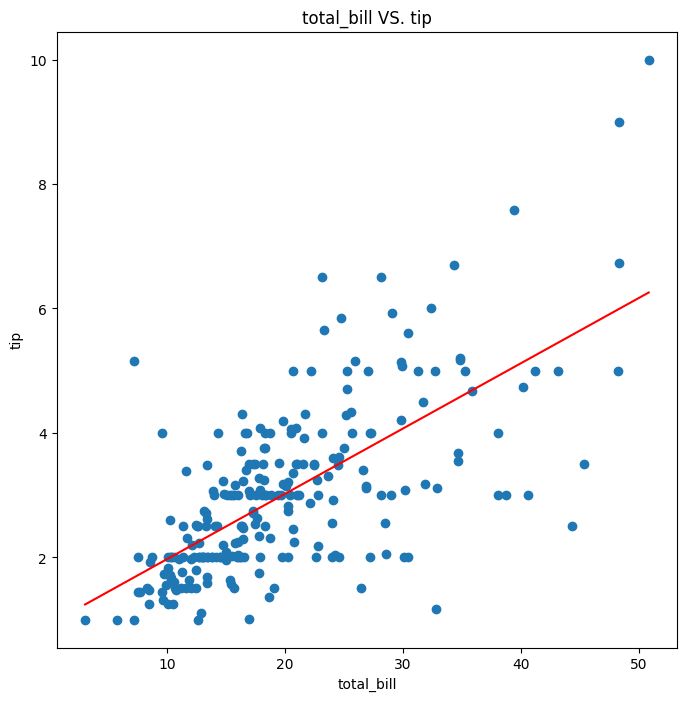

In [8]:
# 计算回归线的系数
coefficients = np.polyfit(data['total_bill'], data['tip'], 1)
# 创建回归线的函数
polynomial = np.poly1d(coefficients)
# 计算对应于total_bill的tip预测值
x_sorted = data['total_bill'].sort_values() # .sort_values() 用于排序，因为 data['total_bill'] 不是有序的
line = polynomial(x_sorted)

# total_bill vs. tip
plt.scatter(data['total_bill'],data['tip'])
plt.plot(x_sorted, line, color='red')
plt.title('total_bill VS. tip')
plt.xlabel('total_bill')
plt.ylabel('tip')

# 显示图形
plt.show()

### 2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）

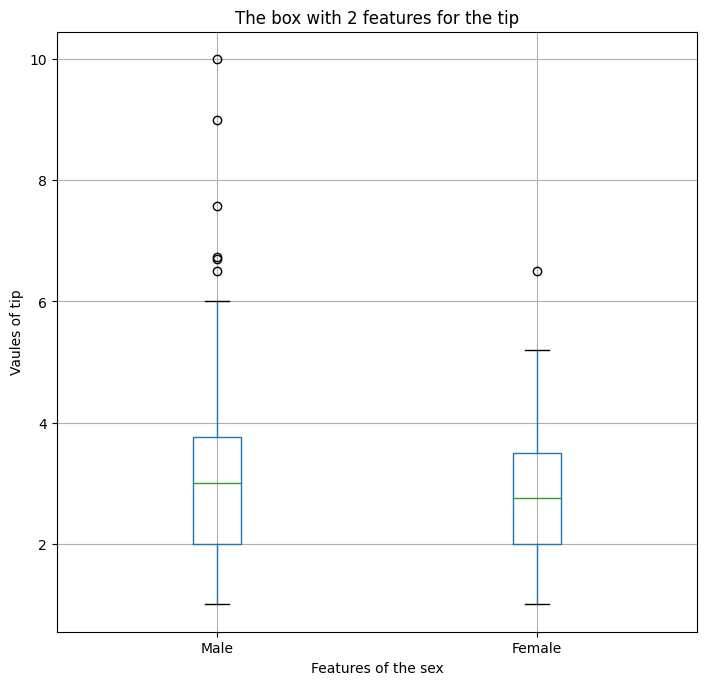

In [9]:
# 绘制箱线图
data.boxplot(column='tip', by='sex')

# 添加标题和标签
plt.title('The box with 2 features for the tip')
plt.suptitle('')  # 去除默认的子标题
plt.xlabel('Features of the sex')
plt.ylabel('Vaules of tip')

# 显示图形
plt.show()

### 3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）

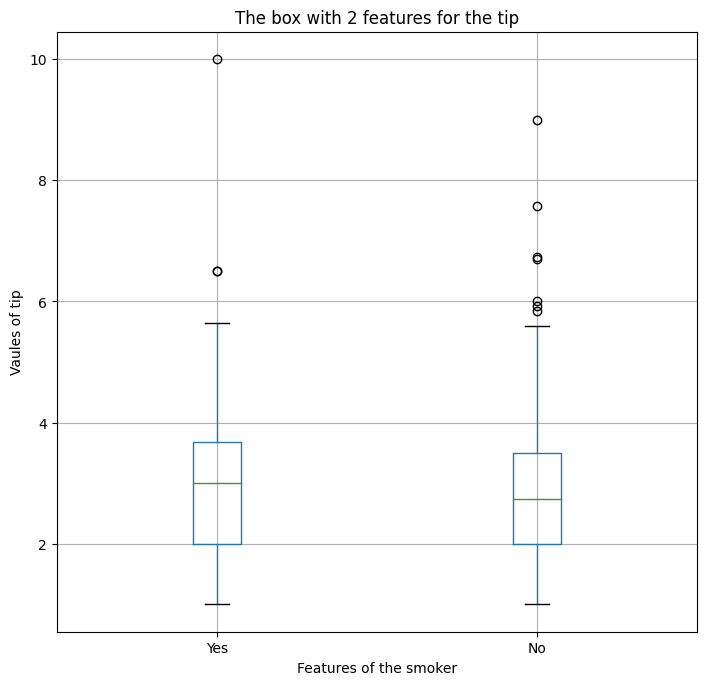

In [10]:
# 绘制箱线图
data.boxplot(column='tip', by='smoker')

# 添加标题和标签
plt.title('The box with 2 features for the tip')
plt.suptitle('')  # 去除默认的子标题
plt.xlabel('Features of the smoker')
plt.ylabel('Vaules of tip')

# 显示图形
plt.show()

### 4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）

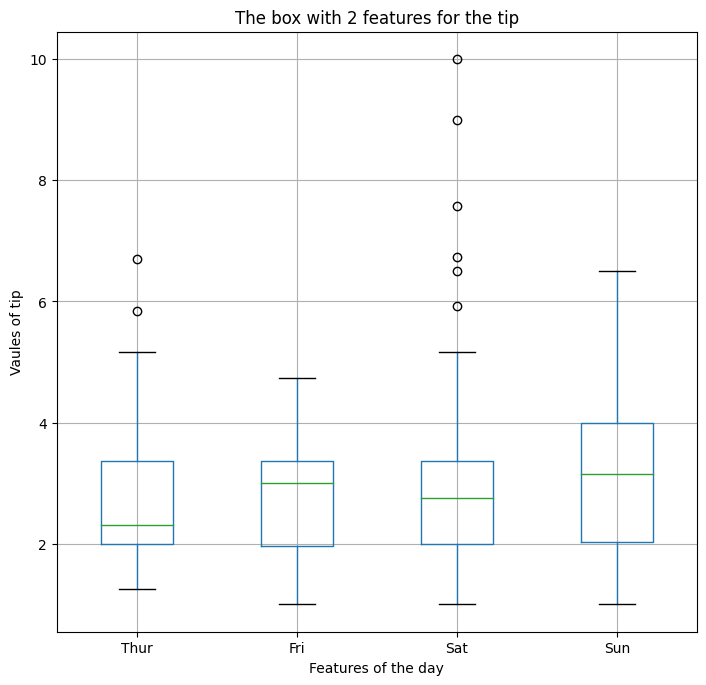

In [11]:
# 绘制箱线图
data.boxplot(column='tip', by='day')

# 添加标题和标签
plt.title('The box with 2 features for the tip')
plt.suptitle('')  # 去除默认的子标题
plt.xlabel('Features of the day')
plt.ylabel('Vaules of tip')

# 显示图形
plt.show()

### 5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）

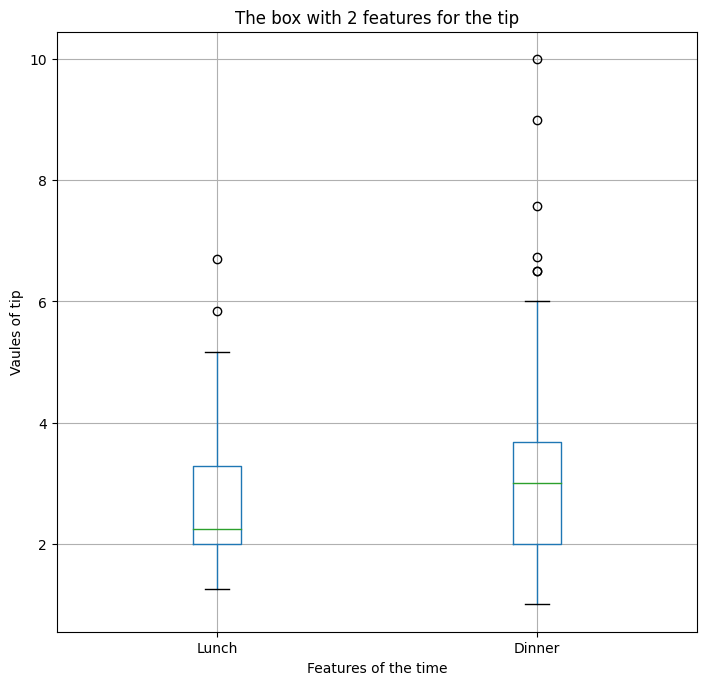

In [12]:
# 绘制箱线图
data.boxplot(column='tip', by='time')

# 添加标题和标签
plt.title('The box with 2 features for the tip')
plt.suptitle('')  # 去除默认的子标题
plt.xlabel('Features of the time')
plt.ylabel('Vaules of tip')

# 显示图形
plt.show()

### 6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）

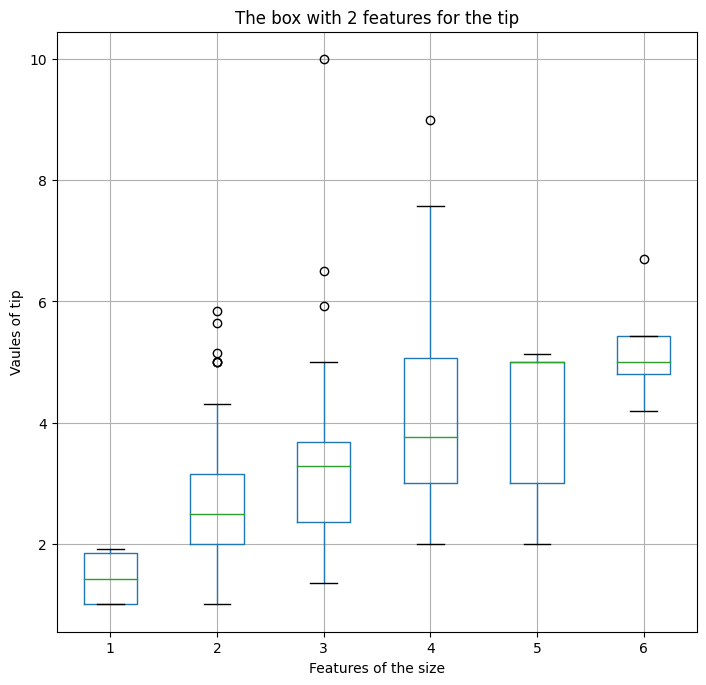

In [13]:
# 绘制箱线图
data.boxplot(column='tip', by='size')

# 添加标题和标签
plt.title('The box with 2 features for the tip')
plt.suptitle('')  # 去除默认的子标题
plt.xlabel('Features of the size')
plt.ylabel('Vaules of tip')

# 显示图形
plt.show()

### 7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

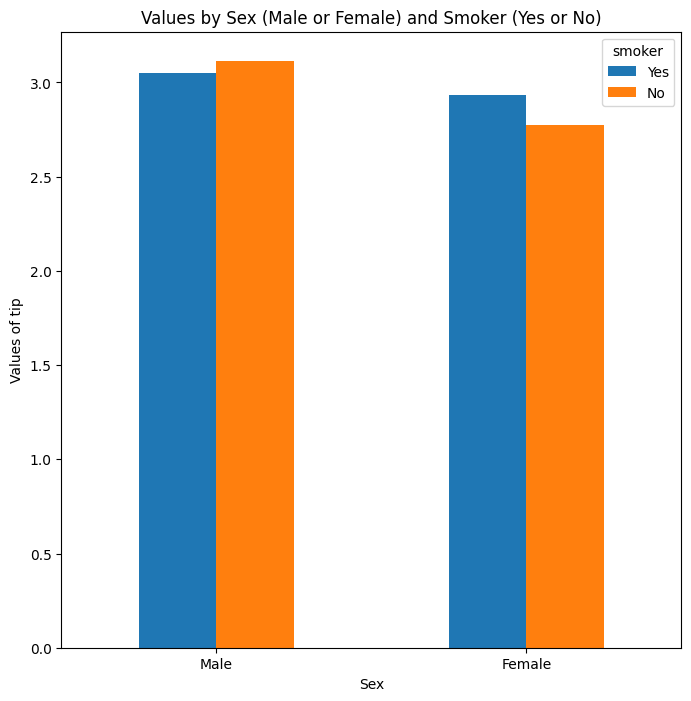

In [14]:
# 计算每个sex和smoker组合的小费
sex_smoker = data.groupby(['sex', 'smoker'])['tip'].mean().unstack()

# 绘制柱状图
sex_smoker.plot(kind='bar', rot=0)

# 添加标题和轴标签
plt.title('Values by Sex (Male or Female) and Smoker (Yes or No)')
plt.xlabel('Sex')
plt.ylabel('Values of tip')

# 显示图形
plt.show()

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [3]:
import seaborn as sns
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）

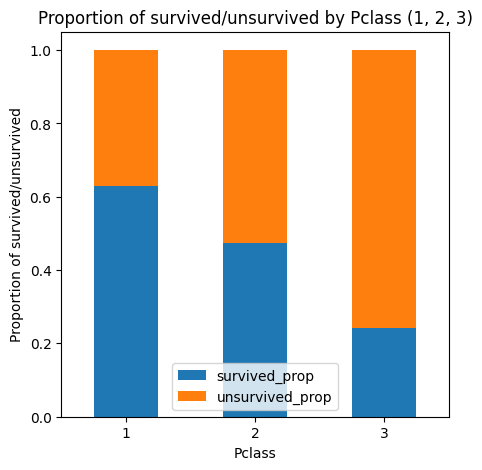

In [4]:
# 设置图片尺寸、字体、网格和背景
plt.rcParams.update({
    'figure.figsize': (5, 5),
    'font.size': 10,
    'axes.grid': False,
    'axes.facecolor': 'white'
})

# 添加遇难列
data['unsurvived'] = 1 - data['survived']  

# 按仓位等级分组
survied_unsurvied = data.groupby('pclass')[['survived', 'unsurvived']].sum()

# 计算生存率和遇难率
survied_unsurvied['total'] = survied_unsurvied['survived'] + survied_unsurvied['unsurvived']
survied_unsurvied['survived_prop'] = survied_unsurvied['survived'] / survied_unsurvied['total']
survied_unsurvied['unsurvived_prop'] = survied_unsurvied['unsurvived'] / survied_unsurvied['total']

# 绘制堆叠柱状图
ax = survied_unsurvied[['survived_prop','unsurvived_prop']].plot(kind='bar', stacked=True)

# 添加标题和标签
ax.set_title('Proportion of survived/unsurvived by Pclass (1, 2, 3)')
ax.set_xlabel('Pclass')
ax.set_ylabel('Proportion of survived/unsurvived')

# 将x轴的标签设置为水平
plt.xticks(rotation=0)

# 显示图形
plt.show()

### 2. 不同性别的幸存比例（提示：箱图或者提琴图）

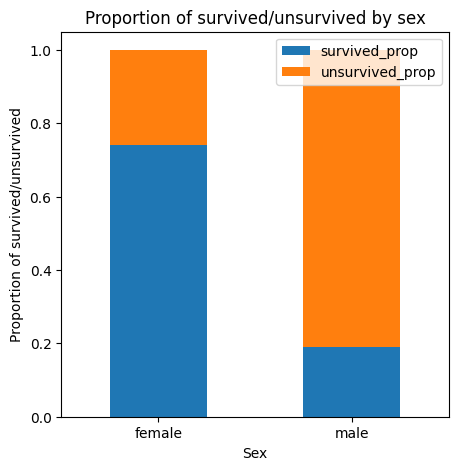

In [5]:
# 添加遇难列
data['unsurvived'] = 1 - data['survived']  

# 按性别分组并计算生存率和遇难率
sex = data.groupby('sex')[['survived', 'unsurvived']].sum()
sex['total'] = sex.sum(axis=1)
sex[['survived_prop', 'unsurvived_prop']] = sex[['survived', 'unsurvived']].div(sex['total'], axis=0)

# 绘制堆叠柱状图
ax = sex[['survived_prop','unsurvived_prop']].plot(kind='bar', stacked=True, rot=0)

# 添加标题和标签
ax.set_title('Proportion of survived/unsurvived by sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Proportion of survived/unsurvived')

# 显示图形
plt.show()

### 3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）

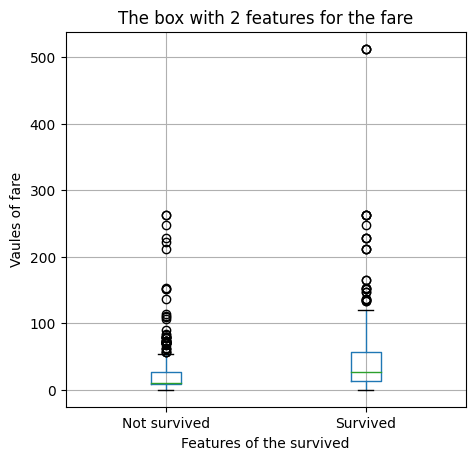

In [6]:
# 绘制箱线图
data.boxplot(column='fare', by='survived')
     # column 参数指定了数据列（票价），by 参数指定了分组的基准（幸存与否）

# 添加标题和标签
plt.title('The box with 2 features for the fare')
plt.suptitle('')  # 去除默认的子标题
plt.xlabel('Features of the survived')
plt.ylabel('Vaules of fare')
plt.xticks([1, 2], ['Not survived', 'Survived'])  # 重命名x轴标签

# 显示图形
plt.show()

### 4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）

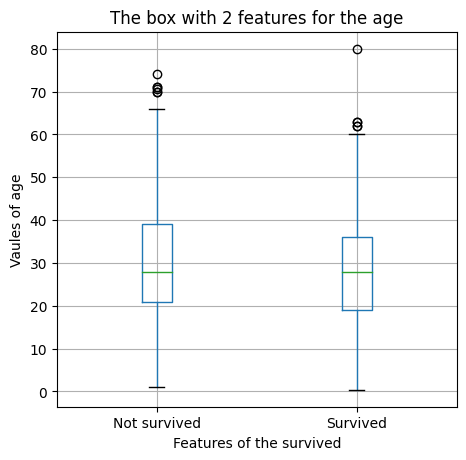

In [8]:
# 绘制箱线图
data.boxplot(column='age', by='survived')

# 添加标题和标签
plt.title('The box with 2 features for the age')
plt.suptitle('')  # 去除默认的子标题
plt.xlabel('Features of the survived')
plt.ylabel('Vaules of age')
plt.xticks([1, 2], ['Not survived', 'Survived'])  # 重命名x轴标签

# 显示图形
plt.show()

### 5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）

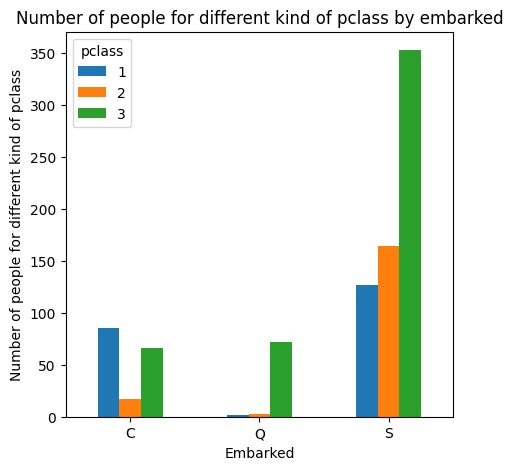

In [9]:
# 计算每个Pclass和Embarked组合的乘客数量
Embarked = data.groupby(['embarked','pclass']).size().unstack()

# 绘制柱状图
Embarked.plot(kind='bar', rot=0)

# 添加标题和轴标签
plt.title('Number of people for different kind of pclass by embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of people for different kind of pclass')

# 显示图形
plt.show()

### 6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）

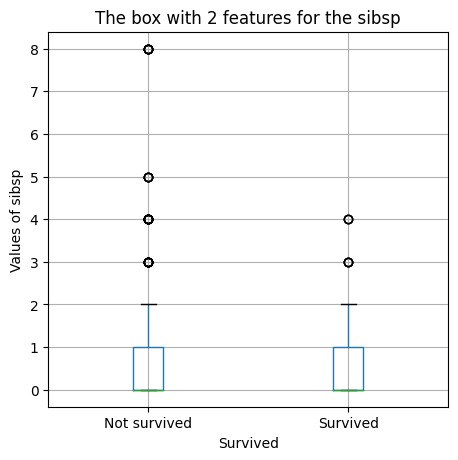

In [10]:
# 按 sibsp 分组求和
data['unsurvived'] = 1 - data['survived']
data['total'] = data['survived'] + data['unsurvived']

# 绘制箱线图
data.boxplot(column='sibsp', by='survived')

# 添加标题和标签
plt.title('The box with 2 features for the sibsp')
plt.suptitle('')  # 去除默认的子标题
plt.xlabel('Survived')
plt.ylabel('Values of sibsp')
plt.xticks([1, 2], ['Not survived', 'Survived'])  # 重命名x轴标签

# 显示图形
plt.show()

### 7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）

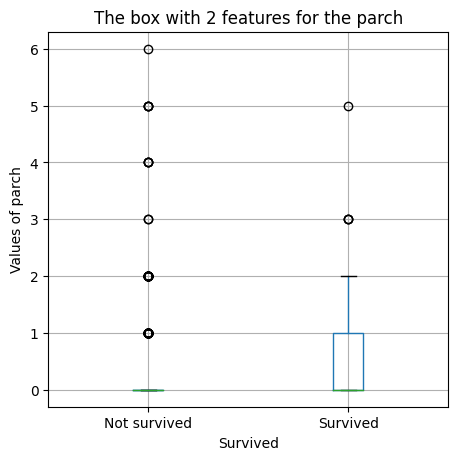

In [11]:
# 按 parch 分组求和
data.groupby('parch')[['survived','unsurvived','total']].sum()

# 绘制箱线图
data.boxplot(column='parch', by='survived')

# 添加标题和标签
plt.title('The box with 2 features for the parch')
plt.suptitle('')  # 去除默认的子标题
plt.xlabel('Survived')
plt.ylabel('Values of parch')
plt.xticks([1, 2], ['Not survived', 'Survived'])  # 重命名x轴标签

# 显示图形
plt.show()

### 8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

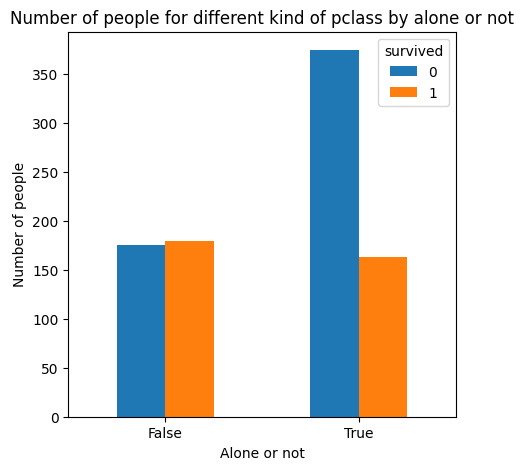

In [12]:
# 计算每个alone和survived组合的乘客数量
alone = data.groupby(['alone','survived']).size().unstack()

# 绘制柱状图
alone.plot(kind='bar', rot=0)

# 添加标题和轴标签
plt.title('Number of people for different kind of pclass by alone or not')
plt.xlabel('Alone or not')
plt.ylabel('Number of people')

# 显示图形
plt.show()